<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise_11_01_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset with brain atlas A for classification tasks: for first set of 5 small programming tasks:
Oasis dataset provided directly by the nilearn package
Can be retrieved by downloading nilearn.datasets.fetch_oasis_vbm(n_subjects=100),
roughly 900 MB, structural brain scans (so-called voxel-based morphometry) for
classification of male and female individuals

Task 1 - Use sklearn.cross_decom position.PLSRegression(n_com ponents=3),
sklearn.cross_decomposition.CCA(n_components=2), and sklearn.discriminant_analysis.LinearDiscriminantAnalysis( n_com ponents=1), encoding
male as +1 and female as –1. Fit separate low-rank pattern-learning models to predict sex based on 100, 200, ..., 1000 brain regions of interest (n_rois) using all 100 subjects. The model predictions will be continuous, so you’ll have to threshold them at zero to get a binary prediction. Plot the in-sample classification accuracy on the 100 subjects (x axis=n_rois, y 
axis=classification performance, 3 lines with 3 colors for the different models).

In [ ]:
%%capture
!pip install nilearn

In [2]:
%%capture
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [3]:
%%capture
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_decomposition import PLSRegression as PLSR
from sklearn.cross_decomposition import CCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [4]:
%%capture
from IPython import display
display.set_matplotlib_formats('svg')

In [7]:
# We predefine the models and scaler
plsr    = PLSR(n_components=3)
cca     = CCA(n_components=2) 
lda     = LDA(n_components=1)
scaler  = StandardScaler()

# We create one pipeline for each model
pipe1 = make_pipeline(scaler, plsr)
pipe2 = make_pipeline(scaler, cca)
pipe3 = make_pipeline(scaler, lda)

In [11]:
# We define the iterating variable (rois) 
rois = [100,200,300,400,500,600,700,800,900,1000]

# We pre-allocate the variables where we will append the scores
score1_1 = []
score2_1 = []
score3_1 = []

In [12]:
%%capture
for r in rois:
  brain_data = datasets.fetch_oasis_vbm(n_subjects=(100))
  yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(r)) # We iterate through 100-1000 rois
  masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
  input_variables = masker.fit_transform(brain_data.gray_matter_maps)
  output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

  X, y = input_variables, output_variable                    # We reinstate X, y at the start of the loop in order to reset their values
  y_cont = np.where(y == 0, -1, y)                           # Ditto for the continous version of y (y_cont)

  plsr_model = pipe1.fit(X, y_cont)                          # We define the plsr model
  plsr_pred = plsr_model.predict(X)                          # We use the fitted model to obtain prediction values on the data
  plsr_pred  = np.where(plsr_pred>0, 1, 0)                   # We re-binarize the prediction values 
  score1 = accuracy_score(y, plsr_pred)                      # We calculate the accuracy between the true labels and the re-binarized predictions
  score1 = np.multiply(score1, 100)                          # We multiply the scores by 100 to get them in percentage form
  score1_1.append(score1)                                    # We store the scores

  cca_model = pipe2.fit(X, y_cont)                           # We define the cca model
  cca_pred = cca_model.predict(X)                            # We use the fitted model to obtain prediction values on the data
  cca_pred  = np.where(cca_pred>0, 1, 0)                     # We re-binarize the prediction values 
  score2 = accuracy_score(y, cca_pred)                       # We calculate the accuracy between the true labels and the re-binarized predictions
  score2 = np.multiply(score2, 100)                          # We multiply the scores by 100 to get them in percentage form
  score2_1.append(score2)                                    # We store the scores

  lda_model = pipe3.fit(X, y_cont)                           # We define the lda model
  lda_pred = lda_model.predict(X)                            # We use the fitted model to obtain prediction values on the data
  lda_pred  = np.where(lda_pred>0, 1, 0)                     # We re-binarize the prediction values 
  score3 = accuracy_score(y, lda_pred)                       # We calculate the accuracy between the true labels and the re-binarized predictions
  score3 = np.multiply(score3, 100)                          # We multiply the scores by 100 to get them in percentage form
  score3_1.append(score3)                                    # We store the scores

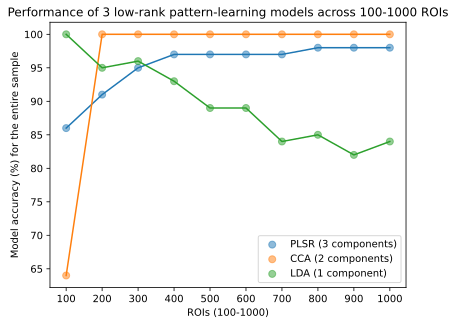

In [13]:
# We're ready to plot
lab = ['PLSR (3 components)', 'CCA (2 components)', 'LDA (1 component)']
plt.style.use("default")
plt.scatter(rois,score1_1, s=50, alpha = 0.5, marker = 'o')
plt.scatter(rois,score2_1, s=50, alpha = 0.5, marker = 'o')
plt.scatter(rois,score3_1, s=50, alpha = 0.5, marker = 'o')
plt.legend(labels=(lab))
plt.gca().set(
    title="Performance of 3 low-rank pattern-learning models across 100-1000 ROIs",
    xlabel="ROIs (100-1000)",
    ylabel="Model accuracy (%) for the entire sample",
    xticks = (rois)
)
plt.plot(rois,score1_1)
plt.plot(rois,score2_1)
plt.plot(rois,score3_1)
plt.show()